<a href="https://colab.research.google.com/github/vikaskumar04121998/practical-for-deep-learning/blob/main/alexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
conv1 = Conv2D(filters=96, input_shape=(32,32,3),kernel_size=(11,11), strides=(4,4), padding='same')
AlexNet.add(conv1)
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
activation_9 (Activation)    (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_10 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_10 (Activation)   (None, 4, 4, 256)        

In [3]:
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [4]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

170500096/170498071 [==============================] - 11s 0us/step
((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


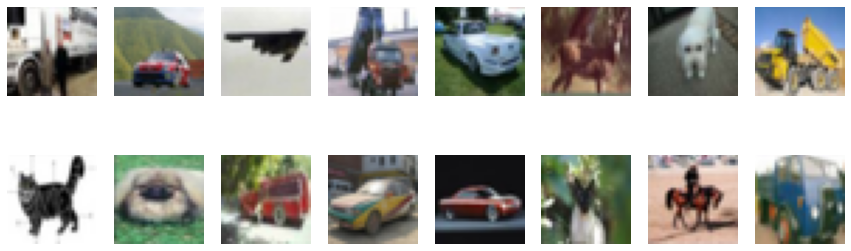

In [38]:
import matplotlib.pyplot as plt
cols = 8
rows = 2
arry=[]
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')   
        ax.imshow(x_train[random_index, :])
plt.show()

In [6]:
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)


In [8]:
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5)

In [10]:
batch_size= 100
epochs=5
learn_rate=.001

In [11]:
AlexNet.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), validation_steps = 250, callbacks = [lrr], verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
350/350 [==============================] - 678s 2s/step - loss: 1.8193 - accuracy: 0.3438 - val_loss: 1.6621 - val_accuracy: 0.4283
Epoch 2/5
350/350 [==============================] - 639s 2s/step - loss: 1.4288 - accuracy: 0.4953
Epoch 3/5
350/350 [==============================] - 634s 2s/step - loss: 1.2945 - accuracy: 0.5510
Epoch 4/5
350/350 [==============================] - 631s 2s/step - loss: 1.2059 - accuracy: 0.5825
Epoch 5/5
350/350 [==============================] - 628s 2s/step - loss: 1.1157 - accuracy: 0.6132


In [43]:
y_pred=AlexNet.predict(x_test)
y_true=np.argmax(y_test,axis=1)
y_pred

array([[6.44443091e-03, 7.40278093e-03, 6.38300553e-02, ...,
        2.33422685e-02, 1.88575406e-02, 1.25525678e-02],
       [4.02767099e-02, 4.41193841e-02, 4.72846292e-02, ...,
        1.64447855e-02, 3.75409544e-01, 4.26834702e-01],
       [1.24652885e-01, 6.80472776e-02, 5.38215749e-02, ...,
        2.41091903e-02, 4.94495332e-01, 1.55635431e-01],
       ...,
       [5.52692334e-04, 1.14392804e-03, 8.20324272e-02, ...,
        7.76080834e-03, 3.77422129e-03, 1.74490828e-03],
       [7.61637650e-03, 1.70453098e-02, 3.07913721e-01, ...,
        3.61581855e-02, 1.63741857e-02, 1.50406118e-02],
       [5.76766860e-03, 6.95182057e-03, 7.82755166e-02, ...,
        6.33416176e-01, 1.21437712e-02, 1.20265642e-02]], dtype=float32)

In [41]:
total_image=x_train.shape[0]+x_val.shape[0]+x_test.shape[0]
print('Total number of images : ',total_image)
print('size of the image : ',x_train.shape[1],'*',x_train.shape[2])
print('Total number of classes : ',y_train.shape[1])

Total number of images :  60000
size of the image :  32 * 32
Total number of classes :  10


In [47]:
from sklearn.metrics import accuracy_score
train_accuracy=x_train.shape[0]/total_image
print('training accuracy : ',  float("{0:.3f}". format(train_accuracy)))

acc_score = AlexNet.evaluate(x_test,y_test)

print ("Test Accuracy = " + str(acc_score[1]))

training accuracy :  0.583
313/313 [==============================] - 24s 77ms/step - loss: 1.7172 - accuracy: 0.4147
Test Accuracy = 0.4147000014781952


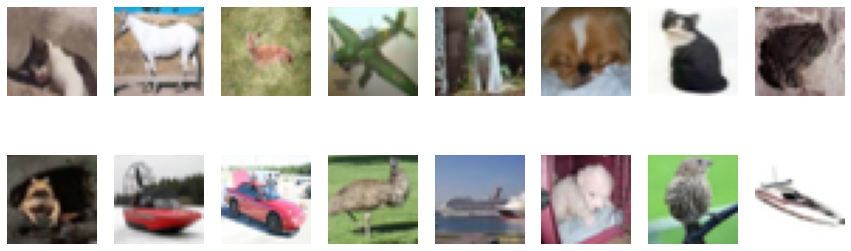

In [39]:
import matplotlib.pyplot as plt
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')   
        ax.imshow(x_test[random_index, :])
plt.show()

In [52]:
coefficient=conv1.kernel
print(coefficient)

<tf.Variable 'conv2d_5/kernel:0' shape=(11, 11, 3, 96) dtype=float32, numpy=
array([[[[ 7.85430335e-03,  2.16813739e-02, -1.56353600e-02, ...,
           1.52309444e-02,  8.36761668e-04, -1.54530555e-02],
         [ 6.20831922e-03,  2.20075939e-02,  1.80233177e-02, ...,
           1.18523408e-02, -1.44533850e-02,  1.92638841e-02],
         [-1.63986422e-02, -7.04518706e-03, -1.15674566e-02, ...,
           5.97547926e-03, -1.86577905e-02, -7.77444150e-03]],

        [[-3.97358648e-03, -4.43787687e-03, -1.01486109e-02, ...,
           1.84754413e-02,  3.68351303e-03,  8.32270272e-03],
         [ 2.08333936e-02,  1.79815795e-02,  2.48174183e-03, ...,
           9.87035595e-03,  4.45579551e-03,  6.19449466e-03],
         [-1.95707809e-02, -1.73219014e-02,  1.04046594e-02, ...,
          -6.99105486e-03, -9.21516400e-03, -1.92268565e-03]],

        [[-7.88876787e-03, -7.55907502e-03,  8.75878148e-03, ...,
          -3.84832732e-03, -1.57785043e-03,  8.47304054e-03],
         [-1.62211489e-